<a href="https://colab.research.google.com/github/KaptanKaraSakal/MachineLearningExamples/blob/master/gymExamplesTaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym Taxi


*   5x5  = 25 Cell
*   RGYB locations for pick up and drop up passengers

# Rewards
*   Positive reward for a successful dropoff (+20)
*   Negative reward for a wrong dropoff (-10)
*   Slight negative reward every time-step (-1)
*   Each successful dropoff is the end of an episode



In [ ]:
import gym
import time
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



#    Passenger locations:
* 0: R(ed)
* 1: G(reen)
* 2: Y(ellow)
* 3: B(lue)
* 4: in taxi
    
#    Destinations:
* 0: R(ed)
* 1: G(reen)
* 2: Y(ellow)
* 3: B(lue)
        
#    Actions:
There are 6 discrete deterministic actions:
* 0: move south
* 1: move north
* 2: move east 
* 3: move west 
* 4: pickup passenger
* 5: dropoff passenger

In [ ]:
#Q Table
no_state = env.observation_space.n
no_action = env.action_space.n

q_table = np.zeros([no_state, no_action])

In [ ]:
#Hyper Parameter
episode_number = 2000
alpha = 0.1 #learning rate
gama = 0.9 #discount rate
epsilon = 0.1 #%10 random %90 exploit

In [ ]:
#Plotting Metrics
reward_list =  []
dropouts = []

In [ ]:
for i in range(1,episode_number):
  state = env.reset()
 
  current_reward = 0
  current_dropout = 0

  while True:
    #exploit or explore (choose action)
    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])
    
    #perform action (and get reward)
    next_state, reward, done, _ = env.step(action)

    #q learnig function
    old_value = q_table[state, action]
    next_max = np.max(q_table[next_state])

    next_value = (1-alpha) * old_value + alpha * (reward + gama * next_max)

    #q table update
    q_table[state, action] = next_value

    #state update
    state = next_state

    #find wrong dropouts
    if reward == -10:
      current_dropout += 1

    if done:
      break
    
    current_reward += reward
  
  if i % 10 == 0:
    dropouts.append(current_dropout)
    reward_list.append(current_reward)
    print("Episode: {}\nReward: {}\nWrong Dropouts: {}\n".format(i,current_reward, current_dropout))

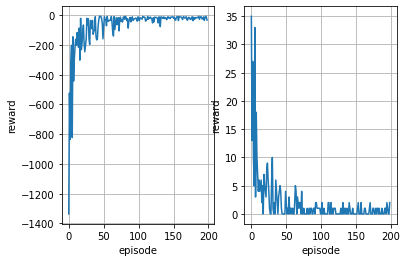

In [ ]:
#visualize
fig, axs = plt.subplots(1,2)
axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")
axs[0].grid(True)

axs[1].plot(dropouts)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("reward")
axs[1].grid(True)

plt.show()